<p><font size="6"><b>Matplotlib & plotnine: Introduction </b></font></p>


> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2016*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---


In [38]:
%matplotlib inline

# Matplotlib

[Matplotlib](http://matplotlib.org/) is a Python package used widely throughout the scientific Python community to produce high quality 2D publication graphics. It transparently supports a wide range of output formats including PNG (and other raster formats), PostScript/EPS, PDF and SVG and has interfaces for all of the major desktop GUI (graphical user interface) toolkits. It is a great package with lots of options.

However, matplotlib is...

> The 800-pound gorilla — and like most 800-pound gorillas, this one should probably be avoided unless you genuinely need its power, e.g., to make a **custom plot** or produce a **publication-ready** graphic.

> (As we’ll see, when it comes to statistical visualization, the preferred tack might be: “do as much as you easily can in your convenience layer of choice [nvdr e.g. directly from Pandas, or with seaborn], and then use matplotlib for the rest.”)

(quote used from [this](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/) blogpost)

And that's we mostly did, just use the `.plot` function of Pandas. So, why do we learn matplotlib? Well, for the *...then use matplotlib for the rest.*; at some point, somehow!

Matplotlib comes with a convenience sub-package called ``pyplot`` which, for consistency with the wider matplotlib community, should always be imported as ``plt``:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## - dry stuff - The matplotlib `Figure`, `axes` and `axis`

At the heart of **every** plot is the figure object. The "Figure" object is the top level concept which can be drawn to one of the many output formats, or simply just to screen. Any object which can be drawn in this way is known as an "Artist" in matplotlib.

Lets create our first artist using pyplot, and then show it:

In [3]:
fig = plt.figure()
plt.show()

On its own, drawing the figure artist is uninteresting and will result in an empty piece of paper (that's why we didn't see anything above).

By far the most useful artist in matplotlib is the "Ax**e**s" artist. The Axes artist represents the "data space" of a typical plot, a rectangular axes (the most common, but not always the case, e.g. polar plots) will have 2 (confusingly named) Ax**i**s artists with tick labels and tick marks.

There is no limit on the number of Axes artists which can exist on a Figure artist. Let's go ahead and create a figure with a single Axes artist, and show it using pyplot:

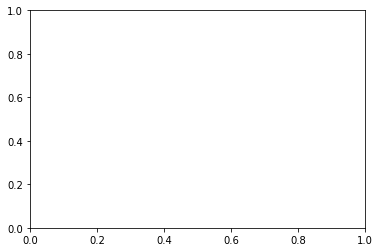

In [4]:
ax = plt.axes()

Matplotlib's ``pyplot`` module makes the process of creating graphics easier by allowing us to skip some of the tedious Artist construction. For example, we did not need to manually create the Figure artist with ``plt.figure`` because it was implicit that we needed a figure when we created the Axes artist.

Under the hood matplotlib still had to create a Figure artist, its just we didn't need to capture it into a variable. We can access the created object with the "state" functions found in pyplot called **``gcf``** and **``gca``**.

## - essential stuff - `pyplot` versus Object based

Some example data:

In [5]:
x = np.linspace(0, 5, 10)
y = x ** 2

Observe the following difference:

**1. pyplot style: plt...** (you will see this a lot for code online!)

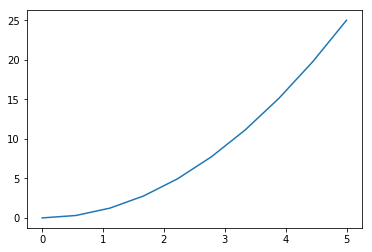

In [6]:
plt.plot(x, y, '-')

**2. creating objects**

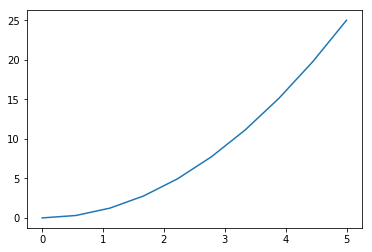

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y, '-')

Although a little bit more code is involved, the advantage is that we now have **full control** of where the plot axes are placed, and we can easily add more than one axis to the figure:

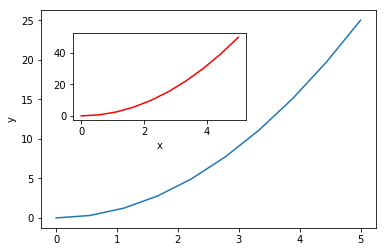

In [8]:
fig, ax1 = plt.subplots()
ax.plot(x, y, '-')
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
ax1.plot(x, y, '-')
ax1.set_ylabel('y')
ax2.set_xlabel('x')
ax2.plot(x, y*2, 'r-')

<div class="alert alert-info" style="font-size:18px">

<b>REMEMBER</b>:

 <ul>
  <li>Use the **object oriented** power of Matplotlib!</li>
  <li>Get yourself used to writing `fig, ax = plt.subplots()`</li>
</ul>
</div>

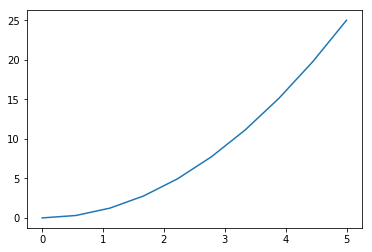

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y, '-')
# ...

## An small cheat-sheet reference for some common elements

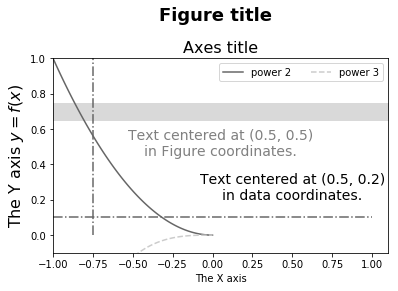

In [10]:
x = np.linspace(-1, 0, 100)

fig, ax  = plt.subplots()

# Adjust the created axes so that its topmost extent is 0.8 of the figure.
fig.subplots_adjust(top=0.8)

ax.plot(x, x**2, color='0.4', label='power 2')
ax.plot(x, x**3, color='0.8', linestyle='--', label='power 3')

ax.vlines(x=-0.75, ymin=0., ymax=1., color='0.4', linestyle='-.') 
ax.hlines(y=0.1, xmin=-1., xmax=1., color='0.4', linestyle='-.')
ax.fill_between(x=[-1, 1.1], y1=[0.65], y2=[0.75], color='0.85')

fig.suptitle('Figure title', fontsize=18, 
             fontweight='bold')
ax.set_title('Axes title', fontsize=16)

ax.set_xlabel('The X axis')
ax.set_ylabel('The Y axis $y=f(x)$', fontsize=16)

ax.set_xlim(-1.0, 1.1)
ax.set_ylim(-0.1, 1.)

ax.text(0.5, 0.2, 'Text centered at (0.5, 0.2)\nin data coordinates.',
        horizontalalignment='center', fontsize=14)

ax.text(0.5, 0.5, 'Text centered at (0.5, 0.5)\nin Figure coordinates.',
        horizontalalignment='center', fontsize=14, 
        transform=ax.transAxes, color='grey')

ax.legend(loc='upper right', frameon=True, ncol=2)

For more information on legend positioning, check [this post](http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot) on stackoverflow!

## I do not like the style...

**...Understandable**

Matplotlib is default very Matlab-lookalike and sometimes not really catchy. The power of the object-oriented way of working makes it possible to change everything. However, mostly we just want **quickly a good-looking plot**. Matplotlib provides a number of styles that can be used to quickly change a number of settings:

In [12]:
plt.style.available

['seaborn-talk',
 'seaborn-poster',
 'seaborn-white',
 'bmh',
 'seaborn-bright',
 'seaborn-deep',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'Solarize_Light2',
 '_classic_test',
 'seaborn-muted',
 'seaborn-darkgrid',
 'fast',
 'classic',
 'seaborn-ticks',
 'grayscale',
 'seaborn-paper',
 'dark_background',
 'seaborn-notebook',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn-pastel',
 'seaborn',
 'ggplot',
 'seaborn-dark']

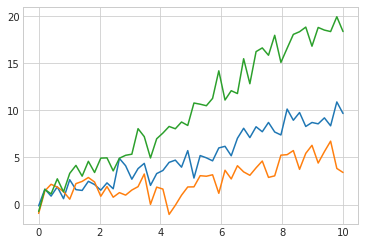

In [17]:
x = np.linspace(0, 10)

with plt.style.context('seaborn-whitegrid'):  # 'ggplot', 'bmh', 'grayscale', 'seaborn-whitegrid', 'seaborn-muted'
    fig, ax = plt.subplots()
    ax.plot(x, np.sin(x) + x + np.random.randn(50))
    ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
    ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))

We should not start discussing about colors and styles, just pick **your favorite style**!

In [18]:
plt.style.use('seaborn-whitegrid')

## Interaction with Pandas

What we have been doing while plotting with Pandas:

In [19]:
import pandas as pd

In [20]:
flowdata = pd.read_csv('../data/vmm_flowdata.csv', 
                       index_col='Time', 
                       parse_dates=True)

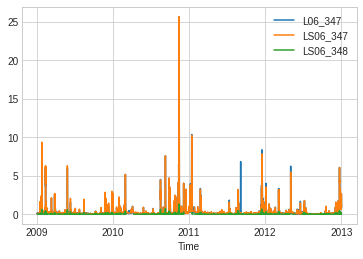

In [21]:
flowdata.plot()

### Pandas versus matplotlib

#### Comparison 1: single plot

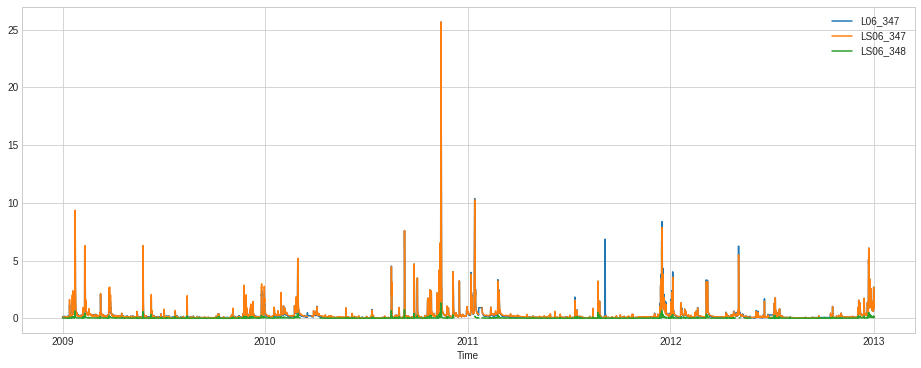

In [22]:
flowdata.plot(figsize=(16, 6)) # shift tab this!

Making this with matplotlib...

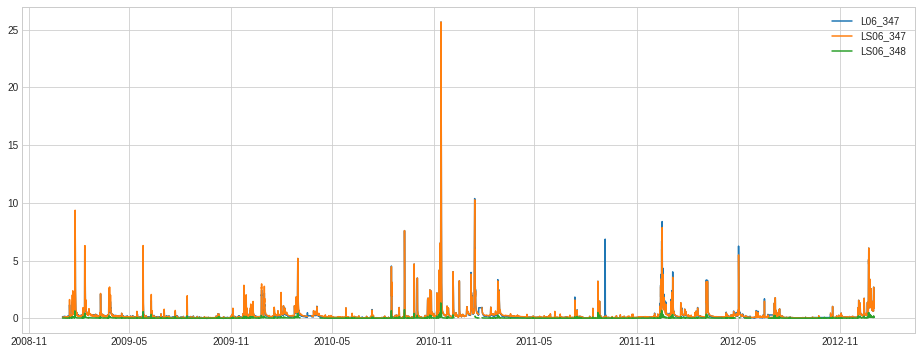

In [23]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(flowdata.index, flowdata["L06_347"],
        flowdata.index, flowdata["LS06_347"], 
        flowdata.index, flowdata["LS06_348"])
ax.legend(["L06_347", "LS06_347", "LS06_348"])

or...

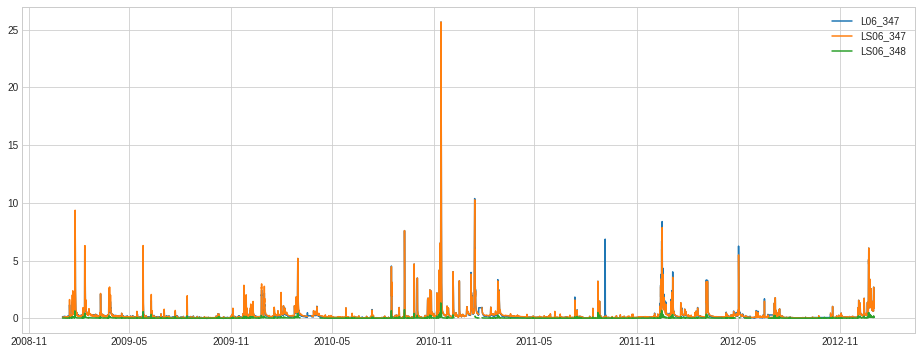

In [24]:
fig, ax = plt.subplots(figsize=(16, 6))
for station in flowdata.columns:
    ax.plot(flowdata.index, flowdata[station], label=station)
ax.legend()

#### Comparison 2: with subplots

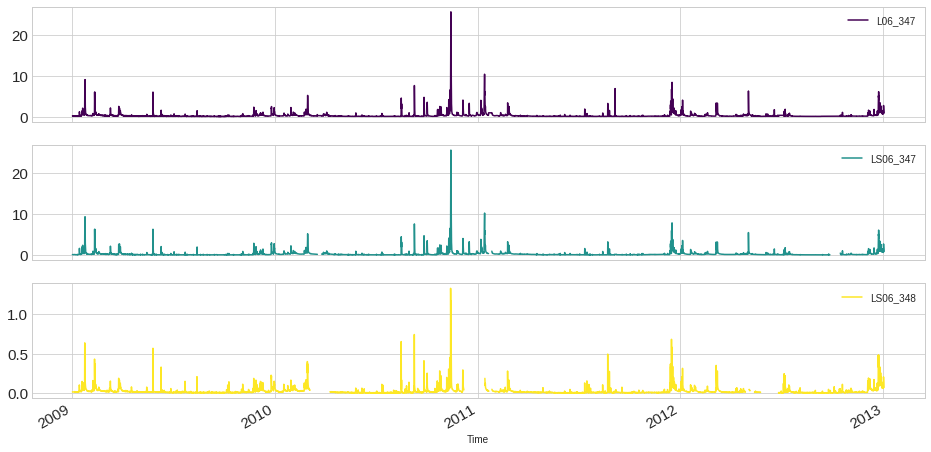

In [25]:
axs = flowdata.plot(subplots=True, sharex=True,
                    figsize=(16, 8), colormap='viridis', # Dark2
                    fontsize=15)

Mimicking this in matplotlib (just as a reference):

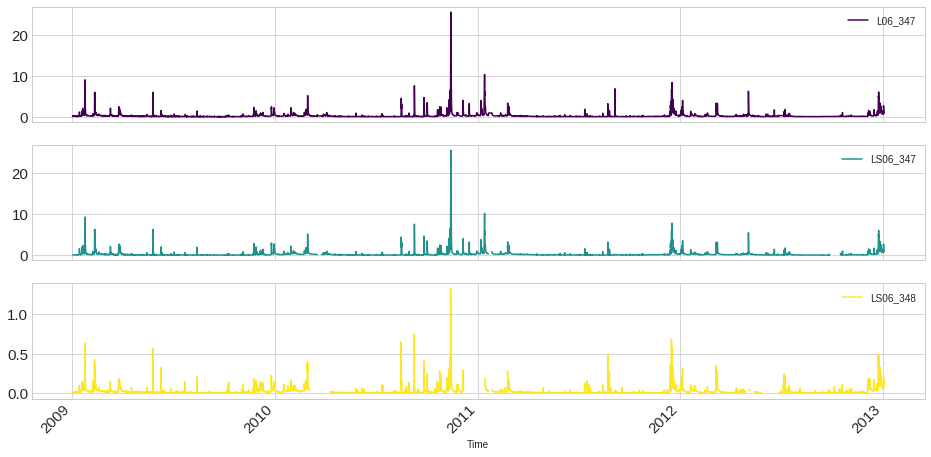

In [26]:
from matplotlib import cm
import matplotlib.dates as mdates

colors = [cm.viridis(x) for x in np.linspace(0.0, 1.0, len(flowdata.columns))] # list comprehension to set up the colors

fig, axs = plt.subplots(3, 1, figsize=(16, 8))

for ax, col, station in zip(axs, colors, flowdata.columns):
    ax.plot(flowdata.index, flowdata[station], label=station, color=col)
    ax.legend()
    if not ax.is_last_row():
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_major_locator(mdates.YearLocator())
    else:
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.set_xlabel('Time')
    ax.tick_params(labelsize=15)
fig.autofmt_xdate(rotation=45)

### Best of both worlds...

Text(0.5,0.98,'Flow station time series')

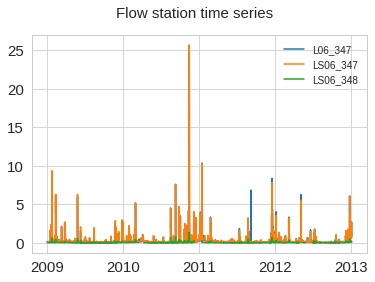

In [32]:
fig, ax = plt.subplots() #prepare a matplotlib figure

flowdata.plot(ax=ax) # use pandas for the plotting

# Provide further adaptations with matplotlib:
ax.set_xlabel("")
ax.tick_params(labelsize=15, pad=8)
fig.suptitle('Flow station time series', fontsize=15)

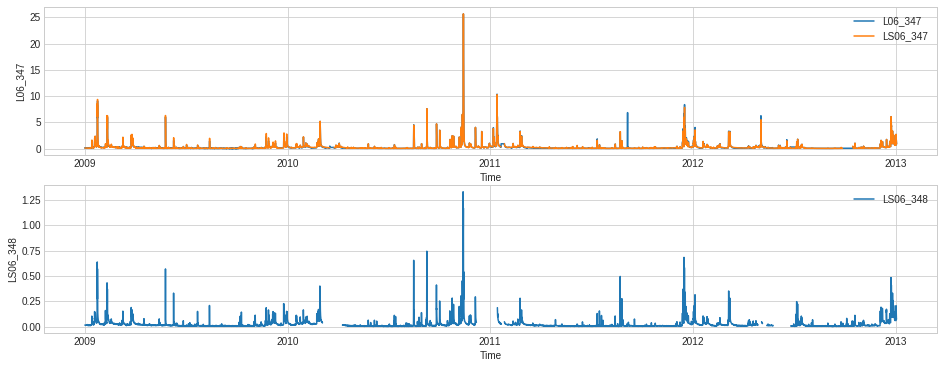

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6)) #provide with matplotlib 2 axis

flowdata[["L06_347", "LS06_347"]].plot(ax=ax1) # plot the two timeseries of the same location on the first plot
flowdata["LS06_348"].plot(ax=ax2) # plot the other station on the second plot

# further adapt with matplotlib
ax1.set_ylabel("L06_347")
ax2.set_ylabel("LS06_348")
ax2.legend()

<div class="alert alert-info">

 <b>Remember</b>: 

 <ul>
  <li>You can do anything with matplotlib, but at a cost... [stackoverflow!!](http://stackoverflow.com/questions/tagged/matplotlib)</li>
  <li>The preformatting of Pandas provides mostly enough flexibility for quick analysis and draft reporting. It is not for paper-proof figures or customization</li>
</ul>
<br>

If you take the time to make you're perfect/spot-on/greatest-ever matplotlib-figure: Make it a **reusable function**!

</div>

An example of such a reusable function to plot data:

In [35]:
%%file plotter.py  
#this writes a file in your directory, check it(!)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib import cm
from matplotlib.ticker import MaxNLocator

def vmm_station_plotter(flowdata, label="flow (m$^3$s$^{-1}$)"):
    colors = [cm.viridis(x) for x in np.linspace(0.0, 1.0, len(flowdata.columns))] # list comprehension to set up the color sequence

    fig, axs = plt.subplots(3, 1, figsize=(16, 8))

    for ax, col, station in zip(axs, colors, flowdata.columns):
        ax.plot(flowdata.index, flowdata[station], label=station, color=col) # this plots the data itself
        
        ax.legend(fontsize=15)
        ax.set_ylabel(label, size=15)
        ax.yaxis.set_major_locator(MaxNLocator(4)) # smaller set of y-ticks for clarity
        
        if not ax.is_last_row():  # hide the xticklabels from the none-lower row x-axis
            ax.xaxis.set_ticklabels([])
            ax.xaxis.set_major_locator(mdates.YearLocator())
        else:                     # yearly xticklabels from the lower x-axis in the subplots
            ax.xaxis.set_major_locator(mdates.YearLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='both', labelsize=15, pad=8) # enlarge the ticklabels and increase distance to axis (otherwise overlap)
    return fig, axs

Writing plotter.py


In [36]:
from plotter import vmm_station_plotter
# fig, axs = vmm_station_plotter(flowdata)

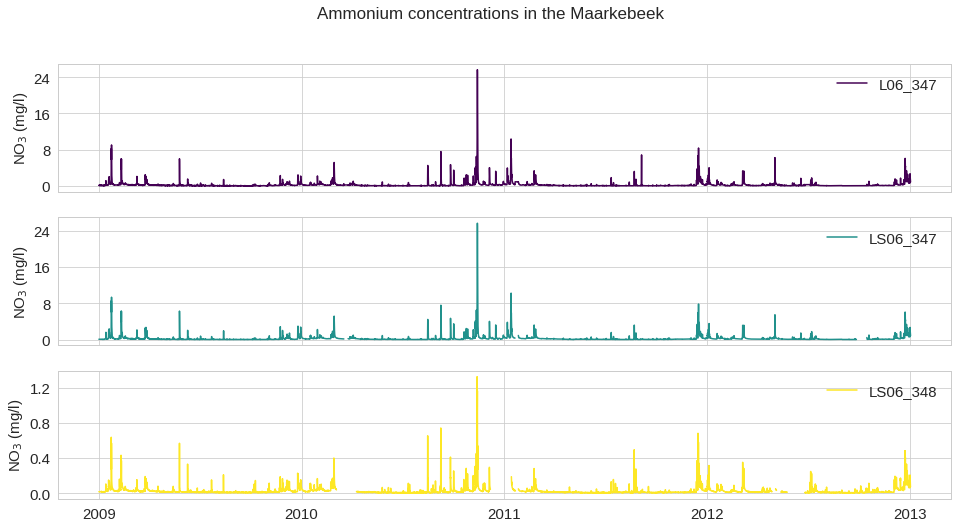

In [37]:
fig, axs = vmm_station_plotter(flowdata, 
                               label="NO$_3$ (mg/l)")
fig.suptitle('Ammonium concentrations in the Maarkebeek', fontsize='17')
fig.savefig('ammonium_concentration.pdf')

<div class="alert alert-danger">

 <b>NOTE</b>: 

<ul>
  <li>Let your hard work pay off, write your own custom functions!</li>
</ul>

</div>

<div class="alert alert-info" style="font-size:18px">

 <b>Remember</b>: 

`fig.savefig()` to save your Figure object!

</div>

# Plotnine

In [254]:
import plotnine as pn

* Built on top of Matplotlib, but providing
    1. High level functions
    2. implementation of the [Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448), which became famous due to the `ggplot2` R package 
    3. The syntax is highly similar to the `ggplot2` R package
* Works well with Pandas

## Introduction

We will use the Titanic example data set:

In [255]:
titanic = pd.read_csv('../data/titanic.csv')

In [256]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's consider following question:
>*For each class at the Titanic, how many people survived and how many died?*

Hence, we should define the *size* of respectively the zeros (died) and ones (survived) groups of column `Survived`, also grouped by the `Pclass`. In Pandas terminology:

In [257]:
survived_stat = titanic.groupby(["Pclass", "Survived"]).size().to_frame('count').reset_index()
survived_stat
# Remark: the `to_frame` syntax is to provide the count column a column name

,Pclass,Survived,count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


Providing this data in a bar chart with pure Pandas is not so straightforward anymore...

In [258]:
## A possible way of plotting this could be using groupby again:
# survived_stat.groupby('Pclass').plot(x='Survived', y='count', kind='bar')

Plotting libraries focussing on the grammar of graphics are really targeting these *grouped* plots. For example, the resulting counts:

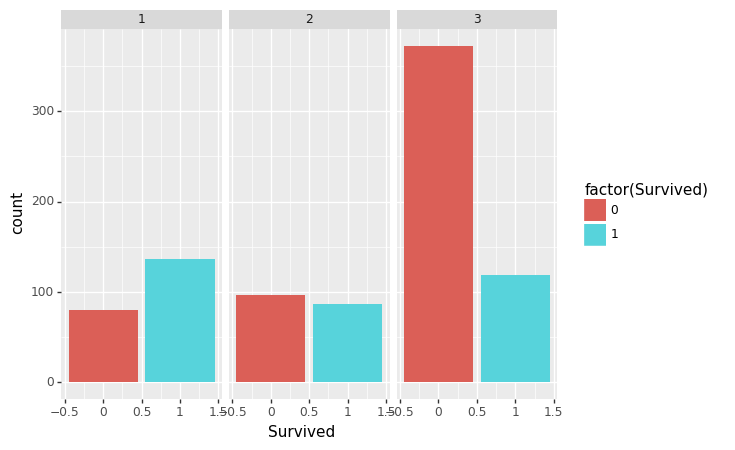

<ggplot: (8777411627717)>

In [364]:
(pn.ggplot(survived_stat, 
           pn.aes(x='Survived', y='count', fill='factor(Survived)'))
    + pn.geom_bar(stat='identity', position='dodge', )
    + pn.facet_wrap(facets='Pclass'))

Actually, these `count` operations are embedded in the typical Grammar of Graphics packages and we can do these operations directly on the original `titanic` data set in a single coding step:

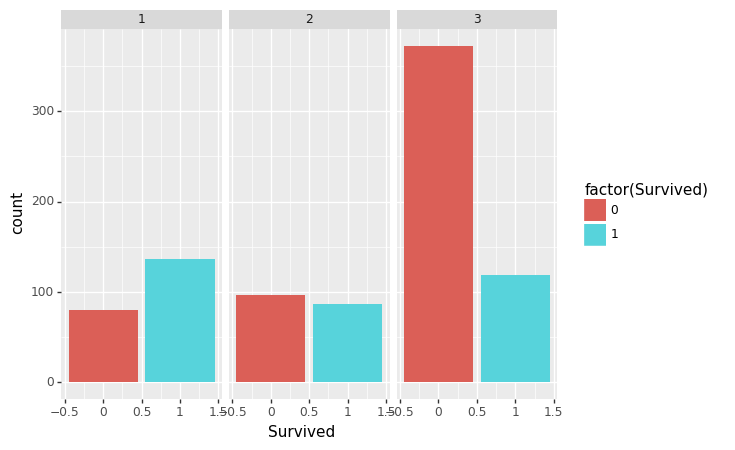

<ggplot: (-9223363259445482594)>

In [260]:
(pn.ggplot(titanic,
           pn.aes(x='Survived', fill='factor(Survived)'))
    + pn.geom_bar(position='dodge')
    + pn.facet_wrap(facets='Pclass'))

<div class="alert alert-info">

 <b>Remember</b>: 

 <ul>
    <li>The <b>Grammar of Graphics</b> is specifally suitbale for these so-called [`tidy`](http://vita.had.co.nz/papers/tidy-data.pdf) data.frame representations</li>
  <li>`plotnine` is a library that supports the Grammar of graphics</li>
</ul>
<br>

</div>

## Building a plotnine graph

Building plots with plotnine is typically an iterative process. As illustrated in the introduction, a graph is setup by layering different elements on top of each other using the `+` operator. putting everything together in brackets `()` provides Python-compatible syntax.

#### data.frame

* Bind the plot to a specific data frame using the data argument:

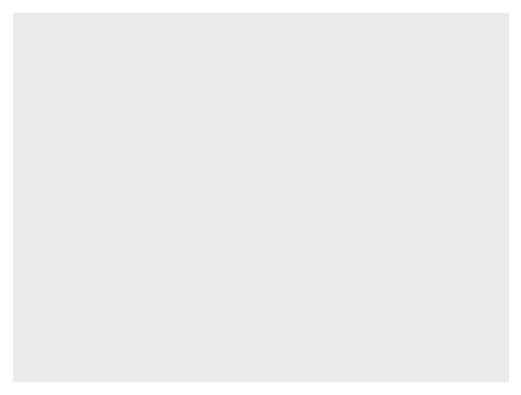

<ggplot: (-9223363259444633333)>

In [346]:
(pn.ggplot(data=titanic))

We haven 't defined anything else, so just an empty *plot* is available. The next step is probably less intuitive:

#### aesthestics

 
* Define aesthetics (**aes**), by **selecting variables** used in the plot and linking them to presentation such as plotting size, shape color, etc. You can interpret this as: **how** the variable will influence the plotted objects/geometries:

The most important `aes` are: `x`, `y`, `alpha`, `color`, `colour`, `fill`, `linetype`, `shape`, `size` and `stroke`

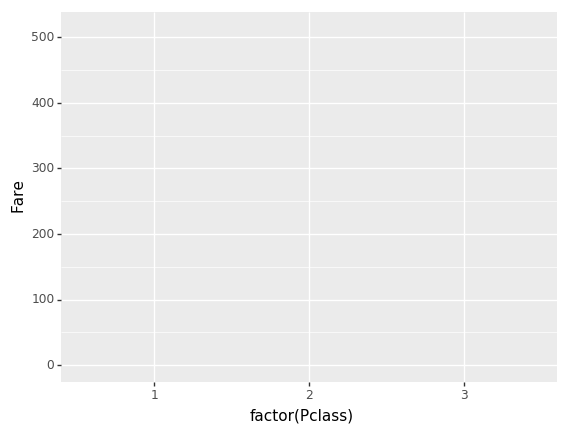

<ggplot: (8777407261630)>

In [347]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare')))

#### geometry

* Still nothing plotted yet, as we have to define what kind of [**geometry**](http://plotnine.readthedocs.io/en/stable/api.html#geoms) will be used for the plot:

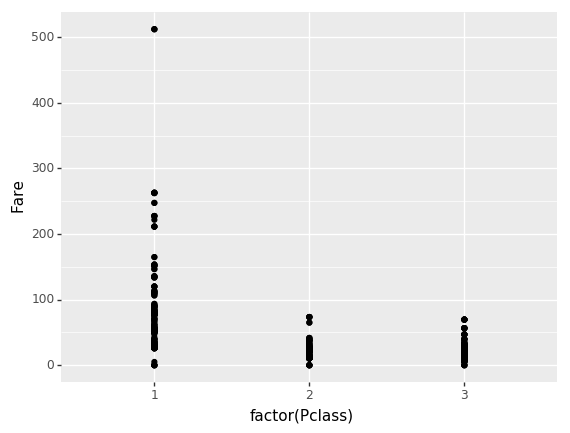

<ggplot: (8777409750550)>

In [303]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point()
) 

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Starting from the code of the last figure, adapt the code in such a way that the `Sex` variable defines the **color** of the points in the graph. </li>
  <li>As both sex categories overlap, use an alternative geometry, so called `geom_jitter` </li>
</ul>
</div>

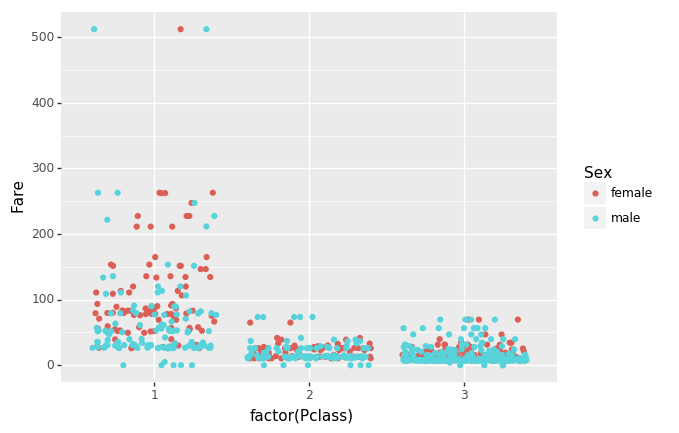

<ggplot: (8777410998662)>

In [312]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare', color='Sex'))
     + pn.geom_jitter()
) 

These are the basic elements to have a graph, but other elements can be added to the graph:

#### labels

* Change the [**labels**](http://plotnine.readthedocs.io/en/stable/api.html#Labels):

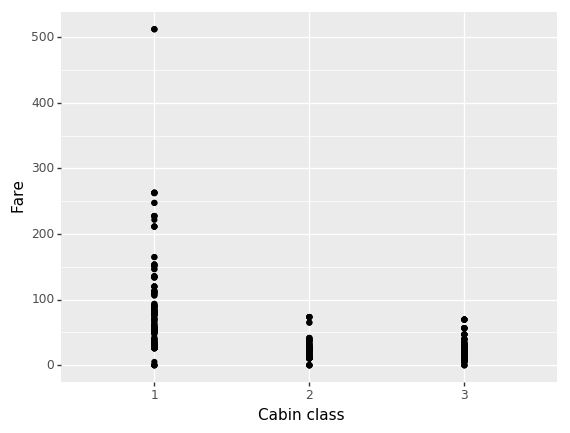

<ggplot: (-9223363259446504718)>

In [354]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point()
     + pn.xlab("Cabin class")
) 

#### facets

* Use the power of `groupby` and define [**facets**](http://plotnine.readthedocs.io/en/stable/api.html#facets) to group the plot by a grouping variable:

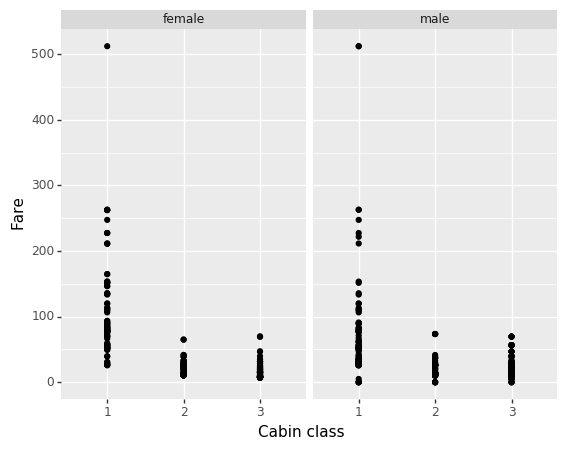

<ggplot: (-9223363259446524251)>

In [355]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point()
     + pn.xlab("Cabin class")
     + pn.facet_wrap('Sex')
) 

#### scales

* Defining [**scale**](http://plotnine.readthedocs.io/en/stable/api.html#scales) for colors, axes,...

For example, a log-version of the y-axis could support the interpretation of the lower numbers:

/home/stijn_vanhoey/.pyenv/versions/miniconda3-4.3.11/envs/DS-python-data-analysis/lib/python3.6/site-packages/plotnine/scales/scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


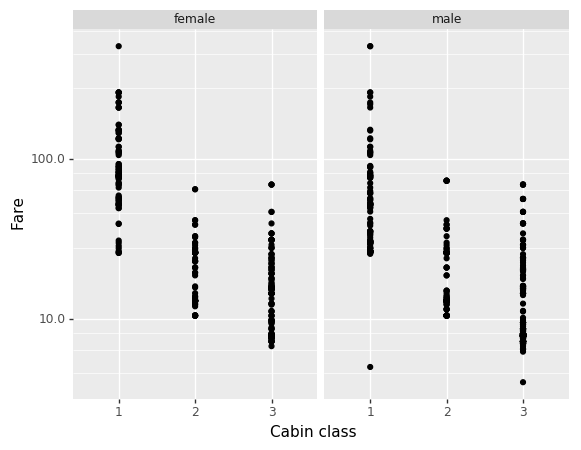

<ggplot: (8777407124593)>

In [356]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point() 
     + pn.xlab("Cabin class")
     + pn.facet_wrap('Sex')
     + pn.scale_y_log10()
) 

#### theme

* Changing [**theme **](http://plotnine.readthedocs.io/en/stable/api.html#themes):

/home/stijn_vanhoey/.pyenv/versions/miniconda3-4.3.11/envs/DS-python-data-analysis/lib/python3.6/site-packages/plotnine/scales/scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


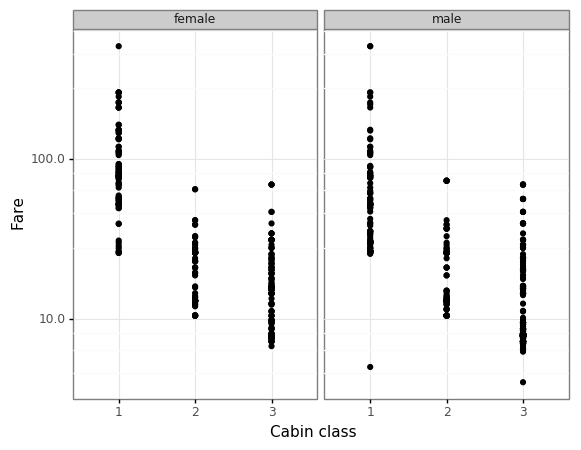

<ggplot: (8777410951414)>

In [357]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point() 
     + pn.xlab("Cabin class")
     + pn.facet_wrap('Sex')
     + pn.scale_y_log10()
     + pn.theme_bw()
) 

or changing specific [theming elements](http://plotnine.readthedocs.io/en/stable/api.html#Themeables), e.g. text size:

/home/stijn_vanhoey/.pyenv/versions/miniconda3-4.3.11/envs/DS-python-data-analysis/lib/python3.6/site-packages/plotnine/scales/scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


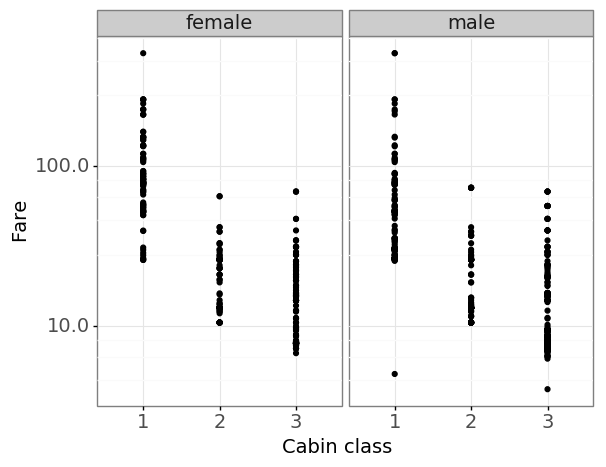

<ggplot: (8777409553016)>

In [359]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point() 
     + pn.xlab("Cabin class")
     + pn.facet_wrap('Sex')
     + pn.scale_y_log10()
     + pn.theme_bw()
     + pn.theme(text=pn.element_text(size=14))
) 

#### more...

* adding [**statistical derivatives**](http://plotnine.readthedocs.io/en/stable/api.html#stats)
* changing the [**plot coordinate**](http://plotnine.readthedocs.io/en/stable/api.html#coordinates) system

<div class="alert alert-info">

 <b>Remember</b>: 

 <ul>
    <li>Start with defining your `data`, `aes` variables and a `geometry`</li>
  <li>Further extend your plot with `scale_*`, `theme_*`, `xlab/ylab`, `facet_*`</li>
</ul>
<br>

</div>

## plotnine is built on top of Matplotlib

As plotnine is built on top of Matplotlib, we can still retrieve the matplotlib `figure` object from plotnine for eventual customization:

In [423]:
myplot = (pn.ggplot(titanic, 
                    pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point()
) 

The trick is to use the `draw` function in plotnine:

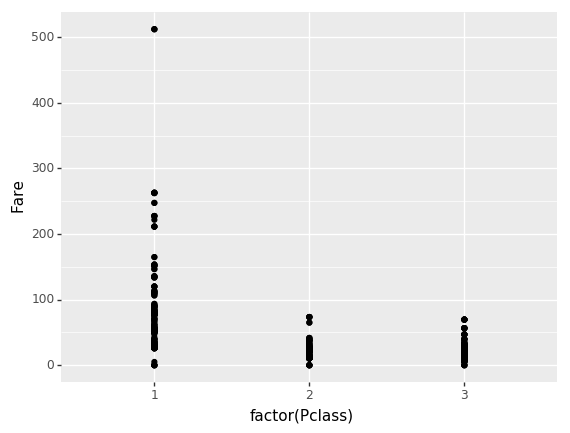

In [424]:
my_plt_version = myplot.draw()

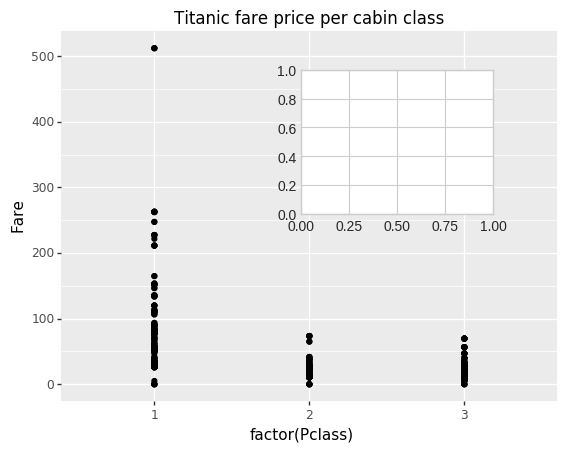

In [425]:
my_plt_version.axes[0].set_title("Titanic fare price per cabin class")
ax2 = my_plt_version.add_axes([0.5, 0.5, 0.3, 0.3], label="ax2")
my_plt_version

<div class="alert alert-info" style="font-size:18px">

 <b>Remember</b>: 

Similar to Pandas handling above, we can set up a matplotlib `figure` wit plotnine. Use `draw()`

</div>

## Some more plotnine functionalities

**Histogram**: Getting the univariaite distribution of the `Age`

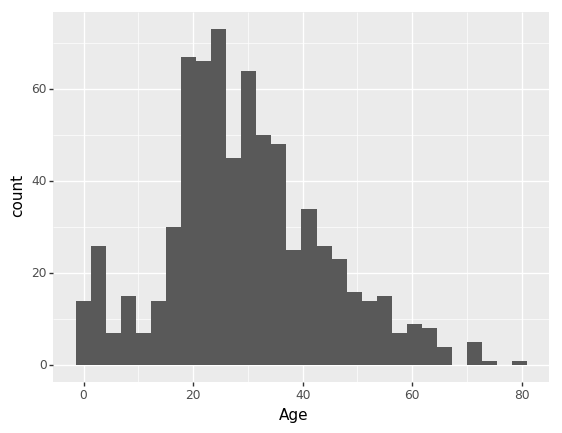

<ggplot: (8777411043918)>

In [437]:
(pn.ggplot(titanic.dropna(subset=['Age']), pn.aes(x='Age'))
     + pn.geom_histogram(bins=30))

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a histogram of the age, grouped by the `Sex` of the passengers</li>
  <li>Make sure both graphs are underneath each other instead of next to each other to enhance comparison</li>

</ul>
</div>

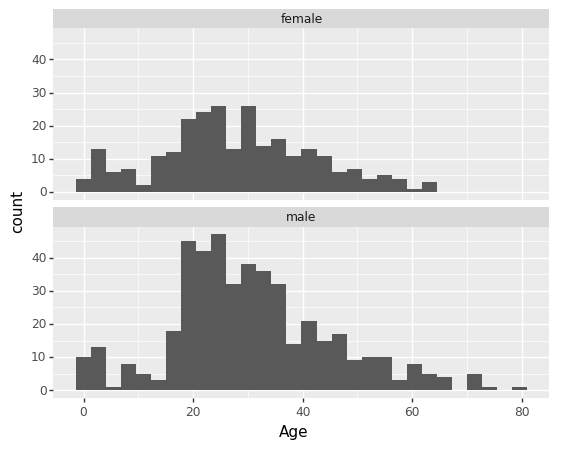

<ggplot: (-9223363259448788413)>

In [472]:
(pn.ggplot(titanic.dropna(subset=['Age']), pn.aes(x='Age'))
     + pn.geom_histogram(bins=30)
     + pn.facet_wrap('Sex', nrow=2)
)

**boxplot/violin plot**: Getting the univariaite distribution of `Age` per `Sex`

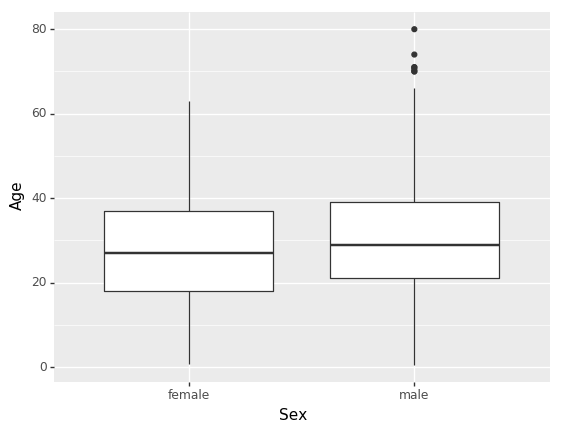

<ggplot: (-9223363259448972961)>

In [473]:
(pn.ggplot(titanic.dropna(subset=['Age']), pn.aes(x='Sex', y='Age'))
     + pn.geom_boxplot())

Actually, a *violinplot* provides more inside to the distribution:

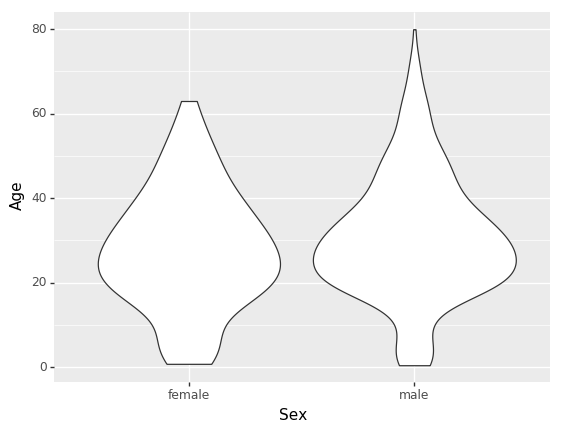

<ggplot: (8777405722488)>

In [474]:
(pn.ggplot(titanic.dropna(subset=['Age']), pn.aes(x='Sex', y='Age'))
     + pn.geom_violin()
)

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a violin plot of the Age for each `Sex`</li>
  <li>Add `jitter` to the plot to see the actual data points</li>
  <li>Adjust the transparency of the jitter dots to improve readability</li>

</ul>
</div>

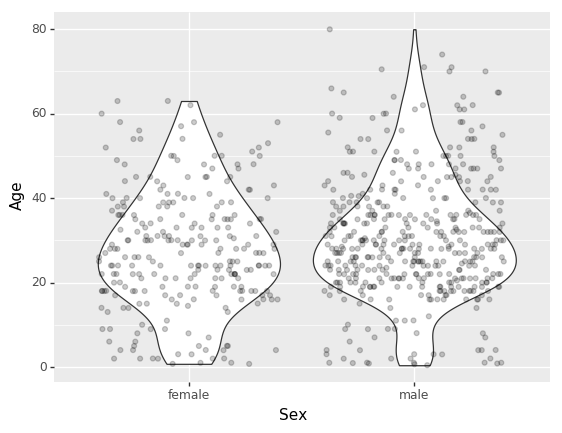

<ggplot: (8777405736989)>

In [475]:
(pn.ggplot(titanic.dropna(subset=['Age']), pn.aes(x='Sex', y='Age'))
     + pn.geom_violin()
     + pn.geom_jitter(alpha=0.2)
)

**regressions**

plotnine supports a number of statistical functions with the [`geom_smooth` function]:(http://plotnine.readthedocs.io/en/stable/generated/plotnine.stats.stat_smooth.html#plotnine.stats.stat_smooth)

The available methods are:
```
* 'auto'       # Use loess if (n<1000), glm otherwise
* 'lm', 'ols'  # Linear Model
* 'wls'        # Weighted Linear Model
* 'rlm'        # Robust Linear Model
* 'glm'        # Generalized linear Model
* 'gls'        # Generalized Least Squares
* 'lowess'     # Locally Weighted Regression (simple)
* 'loess'      # Locally Weighted Regression
* 'mavg'       # Moving Average
* 'gpr'        # Gaussian Process Regressor
```

each of these functions are provided by existing Python libraries and integrated in plotnine, so make sure to have these dependencies installed (read the error message!)

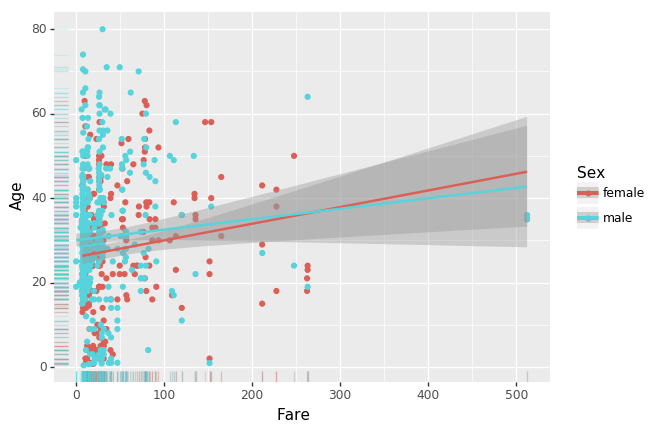

<ggplot: (8777405560012)>

In [480]:
(pn.ggplot(titanic.dropna(subset=['Age', 'Sex', 'Fare']), pn.aes(x='Fare', y='Age', color="Sex"))
     + pn.geom_point()
     + pn.geom_rug(alpha=0.2)
     + pn.geom_smooth(method='lm')
)

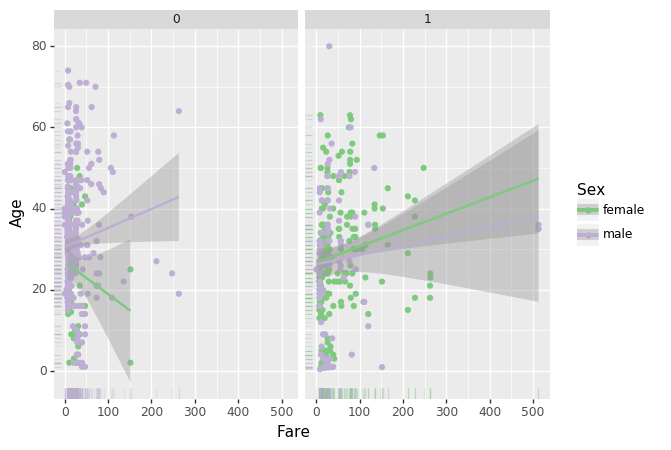

<ggplot: (8777405373234)>

In [481]:
(pn.ggplot(titanic.dropna(subset=['Age', 'Sex', 'Fare']), pn.aes(x='Fare', y='Age', color="Sex"))
     + pn.geom_point()
     + pn.geom_rug(alpha=0.2)
     + pn.geom_smooth(method='lm')
     + pn.facet_wrap("Survived")
     + pn.scale_color_brewer(type="qual")
)

# Need more matplotlib/plotnine inspiration? 

For more in-depth material:
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/
* notebooks in matplotlib section: http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb#4.-Visualization-with-Matplotlib
* main reference: [matplotlib homepage](http://matplotlib.org/)

<div class="alert alert-info" style="font-size:18px">

 <b>Remember</b>(!)

<ul>
  <li>[matplotlib gallery](http://matplotlib.org/gallery.html)</li>
  <li>[plotnine gallery ](http://plotnine.readthedocs.io/en/stable/gallery.html) and [great documentation](http://plotnine.readthedocs.io/en/stable/api.html)</li>
</ul>
<br>
Important resources to start from!

</div>

---
# Acknowledgement


> This notebook is partly based on material of the Met Office (Copyright (C) 2013 SciTools, GPL licensed): https://github.com/SciTools/courses
